# Data Curation & Management – Final Exam
**Semester:** Spring 2025  **Generated:** 2025‑04‑23 17:22

**Student name:** <your name here>

Complete each question in the order given. **Do not delete** any rubric headers marked with 💯 — they are used for grading.
Place any additional code or markdown cells *below* the relevant header.

### Final Project Requirements:
1. The code must run - if any part of the code throws an error, the final will receive a zero grade
2. The code must run in order.  At no time will the kernal need to be restarted or will the grader be required to "go backwards to go forwards".
    3. The grader will select Kernel>Restart Kernel and run all cells.  There should be no reason for that to cause an error
    4. Exception: The grader will have to adjust for the reference to the Kagglehub file only
3. Quality of work is paramount.  Simple results and basic findings will not receive an A.  In other words, the more inspection of the data, the better the grade.


# Final Project Data Selection:

You are now tasked with taking all that you have learned and applying it to a dataset.  For your final project, you will take on the role of a data analyst.  You are tasked with providing data insights and findings based on one of the four data sets found from Kagglehub.

*Note: You can only use one of these four datasets:*

* <a href='https://www.kaggle.com/datasets/bhargavchirumamilla/netflix-movies-and-tv-shows-till-2025'>Netflix Movies & TV Shows (till 2025) </a>
* <a href='https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset'>Global Superstore</a>
* <a href='https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024'>World Happiness Report 2024</a>
* <a href='https://www.kaggle.com/datasets/gitadityamaddali/flipkart-laptop-reviews'>Flipkart/Laptop Reviews (sentiment)</a>

The final project is not just about good code.  Its about using your data analytical mindset to uncover and present findings.  Therefore, basic descriptive statistics and simple aggregations will not suffice.  You are expected to inspect the data, ask probing questions of it, and then present the results, both visually and in a table-based output.

# Q0 Imports

Imports are started here.  If you are using other imports, make sure to include them in the code block below.

In [1]:
# Core data wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text / sentiment analysis (if the dataset has free-text fields)
from textblob import TextBlob

# SQLite persistence
import sqlite3
from sqlalchemy import create_engine, text

# Dataset download via KaggleHub
import kagglehub

# File-system convenience (optional but handy)
from pathlib import Path


## Q1  Dataset selection 💯 (10 pts)

Write 5–8 sentences addressing:
1. Dataset name & Kaggle URL
2. Three columns you anticipate using most
3. Why you have chosen this dataset?
5. Why this dataset can support ≥3 substantive findings

*Replace this markdown with your answer.*

In [ ]:
#The dataset selected is named Global Superstore or Global_Superstore2.csv. URL: (https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset?resource=download). The three columns I anticipate to use most are profit, sub-category and segment. Profit allows me to evaluate overall business performance and determine what is actually getting earning versus losses. Sub-category allows me to view performaces by different product types and view trends acrooos the different types. Segement provides detsils into trends and values of different customer groups like consumers, corporate, home office etc. I chose this dataset because it offers a real world view of retail operations acroess multiple countries, with detailed attributes related to sales, cutomers, products etc. It contains multiple variables that interact in meaningful ways, allowing for cross-dimensional analysis across time, regions, products, and customer types. Its size, variety, and level of detail enable the discovery of more than three substantive insights, as it supports in-depth comparisons, pattern recognition, and trend analysis across different aspects of the business.   

## Q2  ETL pipeline 💯 (25 pts)

Follow the sub‑sections below. Each must run top‑to‑bottom on a fresh kernel. After `Kernel ▸ Restart & Run All` the notebook must complete without manual intervention (except editing the DATA_PATH cell above).


### 2a Extract

In [2]:
# Use kagglehub or manual download here

df = pd.read_csv('Global_Superstore2.csv', encoding='latin1')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


### 2b Transform – cleaning & feature engineering

In [3]:
# Typical tasks: .dropna(), .astype(), explode(), new columns, aggregations

#Drop rows with missing values
df = df.dropna(subset=['Sales', 'Profit', 'Category'])

#Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y', errors='coerce')
df = df.dropna(subset=['Order Date', 'Ship Date'])

#Convert 'Quantity' to integer
df = df[df['Quantity'].notna()]
df['Quantity'] = df['Quantity'].astype(int)

#Calculate shipping delay (in days)
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

#Calculate profit margin percentage
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

#Example explode
df['Dummy List'] = df['Category'].apply(lambda x: [x])  # Wrap in list
df = df.explode('Dummy List')

#Simple aggregation: total sales per category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

#Results
df.head(), category_sales.head()



(   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
 0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
 1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
 2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
 3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
 4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   
 
       Customer Name      Segment           City            State  ...  \
 0       Rick Hansen     Consumer  New York City         New York  ...   
 1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
 2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
 3  Katherine Murray  Home Office         Berlin           Berlin  ...   
 4       Rick Hansen     Consumer          Dakar            Dakar  ...   
 
                                         Product Name     Sales Quantity  \
 0

### 2c Load – save to SQLite

In [6]:
import sqlite3
from sqlalchemy import create_engine

engine = create_engine('sqlite:///project.db')
# Save your DataFrame to the SQLite db, giving the table a meaningful name
df.to_sql('superstore_data', con=engine, index=False, if_exists='replace')

df_check = pd.read_sql('SELECT * FROM superstore_data LIMIT 5', con=engine)

#Result
print(df_check)

   Row ID         Order ID                  Order Date  \
0   32298   CA-2012-124891  2012-07-31 00:00:00.000000   
1   26341    IN-2013-77878  2013-02-05 00:00:00.000000   
2   25330    IN-2013-71249  2013-10-17 00:00:00.000000   
3   13524  ES-2013-1579342  2013-01-28 00:00:00.000000   
4   47221     SG-2013-4320  2013-11-05 00:00:00.000000   

                    Ship Date     Ship Mode Customer ID     Customer Name  \
0  2012-07-31 00:00:00.000000      Same Day    RH-19495       Rick Hansen   
1  2013-02-07 00:00:00.000000  Second Class    JR-16210     Justin Ritter   
2  2013-10-18 00:00:00.000000   First Class    CR-12730      Craig Reiter   
3  2013-01-30 00:00:00.000000   First Class    KM-16375  Katherine Murray   
4  2013-11-06 00:00:00.000000      Same Day     RH-9495       Rick Hansen   

       Segment           City            State  ...  \
0     Consumer  New York City         New York  ...   
1    Corporate     Wollongong  New South Wales  ...   
2     Consumer       Br

### Q2 Rubric – ETL Pipeline

| Sub-task | Criteria | Pts |
|----------|----------|-----|
| **2a & 2b  Cleaning & transformation** | Applies appropriate pandas cleaning techniques (`dropna`, `astype`, deduplication, etc.) | **10** |
| **2b  Feature engineering / aggregation** | Creates **≥ 1** new meaningful column *or* aggregated table (e.g., groupby summary) | **10** |
| **2c  Load to SQLite** | Writes the cleaned DataFrame(s) to `project.db` without errors (`to_sql`, correct schema) | **5** |
| **Section total** |   | **25 pts** |


## Q3  Analytical findings 💯 (30 pts)

In this section, you will reference the cleaned dataframe you created in step 2b.  

Each finding section will display:
1. What is the question you posed of the data.
2. A description of the code logic that was used to answer the question. This is a high-level overview (1-3 sentences) of the code's process.
3. The answer or findings to the question.  This is a descriptive answer, with numbers referenced if applicable.
    4. Note that the pandas code that produces the answer will reflect and support your findings/answer.
    5. Each Finding block must finish with one pandas DataFrame showing the key numbers that appear in your narrative.

### Finding 1

**Question:** Which product sub-categories are the most frequently ordered?

**Method:** (one‑sentence summary of your pandas logic)
**Answer:** Used value_counts on 'sub-category' column to count the frequency of each sub category in the dataset to identify most popular sub-categories.

Write your narrative above, then run the code cell below to compute it

In [14]:
# pandas code producing the answer

sub_category_counts = df['Sub-Category'].value_counts().reset_index()
sub_category_counts.columns = ['Sub-Category', 'Count']

# Display the results (optional)
sub_category_counts.head()

,Sub-Category,Count
0,Binders,6152
1,Storage,5059
2,Art,4883
3,Paper,3538
4,Chairs,3434


### Finding 2
**Question:**  Which product category generates the highest average profit?
**Method:** *(one‑sentence summary of your pandas logic)*  
**Answer:**  Grouped the category column and calculated the mean of profit values for each group to determine which categoy has the highest average profit

_Write your narrative above, then run the code cell below to compute it._

In [8]:
# pandas code producing the answer
avg_profit = df.groupby('Category')['Profit'].mean().reset_index()

#Result
avg_profit

,Category,Profit
0,Furniture,28.878567
1,Office Supplies,16.578961
2,Technology,65.454958


### Finding 3
**Question:**  Which customer segment generates the highest total profit?
**Method:** *(one‑sentence summary of your pandas logic)*  
**Answer:**  Grouped 'segment' column and summed the profit values to compare total profits acorss each customer segment.

_Write your narrative above, then run the code cell below to compute it._

In [10]:
# pandas code producing the answer
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()

#Round as it looks cleaner
segment_profit['Profit'] = segment_profit['Profit'].round(0).astype(int)

#Result
segment_profit

,Segment,Profit
0,Consumer,749240
1,Corporate,441208
2,Home Office,277009


#### Q3 Rubric

| Component | Criteria | Points per finding |
|-----------|----------|--------------------|
| **Narrative clarity** | • States a **specific** question or hypothesis<br>• Summarises the answer in plain English<br>• ≤ 120 words, grammatically sound | **3 pts** |
| **Code correctness & reproducibility** | • Uses pandas and/or SQL to produce the stated result<br>• Runs without errors after **Kernel ▸ Restart & Run All**<br>• Shows only essential steps (no orphan vars) | **4 pts** |
| **Tabular evidence** | • Displays a concise DataFrame (≤ 10 rows × 5 cols) **or** a scalar value matching the narrative<br>• Columns clearly named; units (if any) included | **3 pts** |

**Total per finding:** **10 pts**  
Three findings × 10 pts = **30 pts**


## Q4  Visual communication 💯 (20 pts)

**Generate one chart per finding below.**

This can be either:
* Visual representations of the findings in the last section
* Visuals of the data that helped you in determining the direction you chose to go with the data

Remember: Basic statistical visualizations may not suffice, especially if the statistics have no bearing on your findings.

**Requirements for all visualizations:**
1. Title & axes labels are mandatory —every chart must call plt.title() and label both axes (or legend if an axis is categorical).
2. One chart per code cell —no sub-plots or multiple figures in the same cell.
3. Chart type must fit the data —pick an appropriate visual (bar for categories, line for trends, scatter for correlation, etc.).
4. Legible & uncluttered —limit categories/points so labels don’t overlap; use consistent font sizes and plt.tight_layout() when needed.
5. Consistent styling —use a coherent colour palette across all three charts and include a legend when more than one series appears.

### Chart for Finding 1

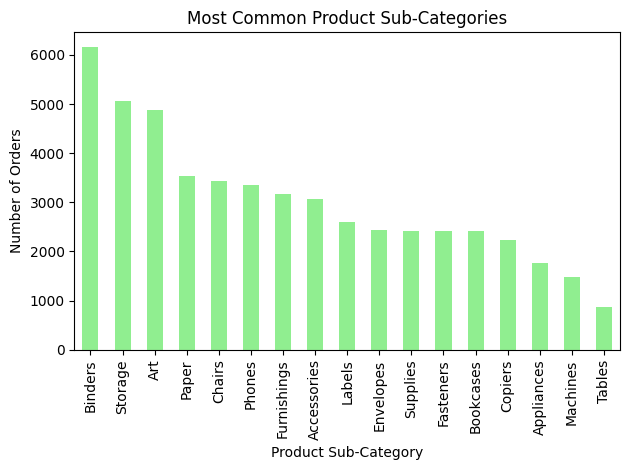

In [20]:
# e.g. df.plot(kind='bar'); plt.title('...')
#Which product sub-categories are the most frequently ordered?
import matplotlib.pyplot as plt

sub_category_counts = df['Sub-Category'].value_counts().reset_index()
sub_category_counts.columns = ['Sub-Category', 'Count']

# Plot the data (Bar chart)
sub_category_counts.plot(kind='bar', x='Sub-Category', y='Count', legend=False, color='lightgreen')
plt.title('Most Common Product Sub-Categories')
plt.xlabel('Product Sub-Category')
plt.ylabel('Number of Orders') 
plt.tight_layout()
plt.show()

### Chart for Finding 2

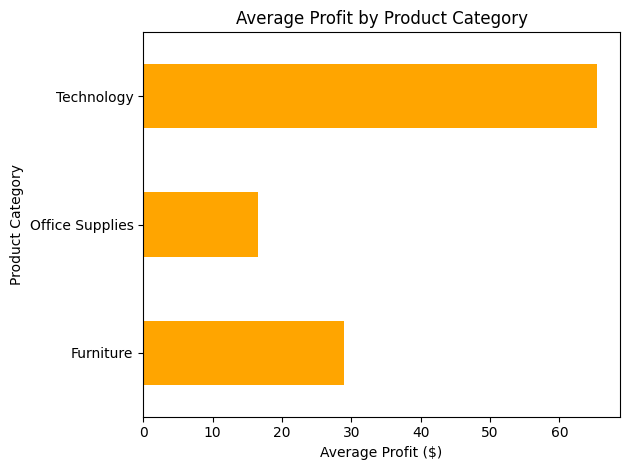

In [17]:
# e.g. df.plot(kind='bar'); plt.title('...')

#Average profit per category (horizontal bar chart)
import matplotlib.pyplot as plt

avg_profit.plot(kind='barh', x='Category', y='Profit', legend=False, color='orange')
plt.title('Average Profit by Product Category')
plt.xlabel('Average Profit ($)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

### Chart for Finding 3

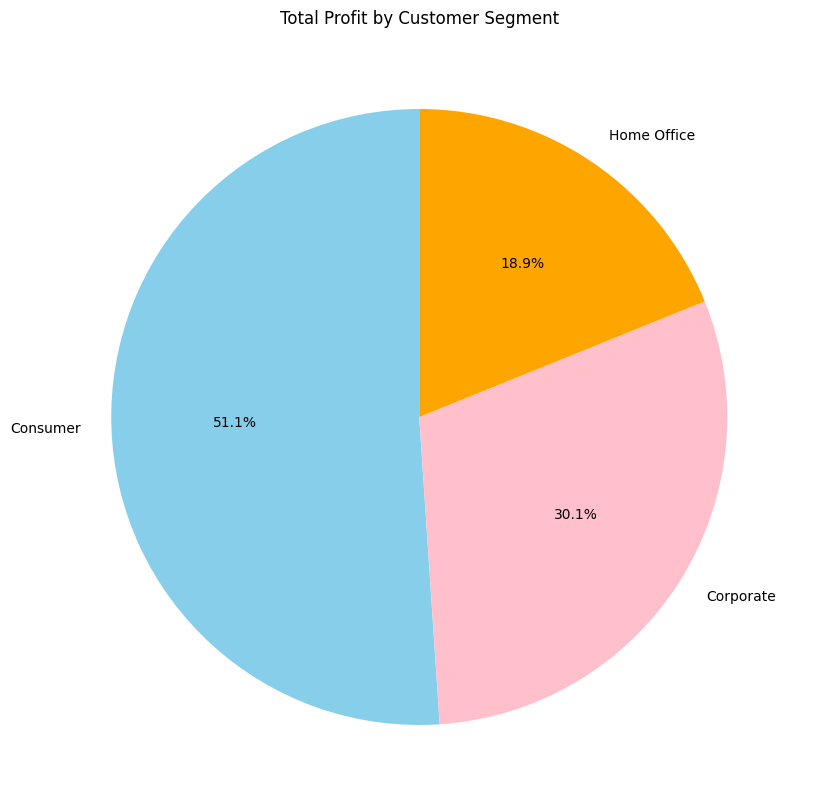

In [24]:
# e.g. df.plot(kind='bar'); plt.title('...')

#Which customer segment generates the highest total profit
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.pie(segment_profit['Profit'], labels=segment_profit['Segment'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink', 'orange'])
plt.title('Total Profit by Customer Segment')
plt.show()

#### Q4  Rubric – Visual Communication

The section requires **three** separate charts (one per finding).  
Each chart is worth **6 pts**, and 2 pts are reserved for code hygiene.

| For **each** chart | What we’re looking for | Pts |
|--------------------|-----------------------|-----|
| **Technical correctness** | Chart executes without error; chosen type matches the data | **2** |
| **Annotation quality** | Descriptive title **and** properly labelled axes (legend if needed) | **2** |
| **Clarity & alignment** | Readable layout (no label overlap, sensible scales) **and** the graphic clearly supports its finding | **2** |
| **Subtotal per chart** |   | **6 pts** |

**3 charts × 6 pts = 18 pts**

| Overall notebook | Criteria | Pts |
|------------------|----------|-----|
| **Code hygiene** | One chart per cell, consistent styling, tidy comments | **2 pts** |

| **Section total** |   | **20 pts** |



## Q5  Reproducibility & reflection 💯 (15 pts)

### 5a Sample SQL

Using SQL only, a technique to get a sample of the data.  This can be done any way you want.

You must describe what the SQL is doing and why that SQL logic is returning a sample (subset) of the data.

### 5 a  Sample SQL (basic proficiency)

Write **one** `SELECT` statement against the `project.db` SQLite file you created.  your SQL statement will return a smaller dataset. This can be done by using one of three options:  

* filter rows with a `WHERE` clause  
* limit the output with `LIMIT n`  
* perform a simple aggregation with `GROUP BY` (e.g., `COUNT(*)`, `AVG()`, or `SUM()`)

The query should reproduce—or directly support—**any numeric result** you cited in Findings 1-3.

1. Paste the SQL in a code block below, assigning it to a variable.
2. Reference that SQL in your read_sql statement.



In [31]:
# sql string goes here

#Which customer segment generates the highest total profit
sql_query = """
SELECT Segment, SUM(Profit) AS Total_Profit
FROM superstore_data
WHERE Profit > 0 
GROUP BY Segment
ORDER BY Total_Profit DESC
"""

In [32]:
import pandas as pd, sqlite3
con = sqlite3.connect('project.db')
# sample_df = pd.read_sql(sql string from prior code block, con)

con = sqlite3.connect('project.db')
sample_df = pd.read_sql(sql_query, con)
con.close()

sample_df

,Segment,Total_Profit
0,Consumer,1.226597e+06
1,Corporate,7.162974e+05
2,Home Office,4.452088e+05


*(describe your SQL logic here)*
#The SQL calculates the total profit generated by each customer segment in superstore_data table. It filters the dataset to include only rows where profit is greater than sezo to focus on segments that contribute dpositively. The group by aggregates prifts by segment and SUM(Profit) calculates total profit per group and then orders the results in descending order

### 5b Limitations / next steps

_In 2–3 sentences, discuss data limitations, assumptions, and future work._
#Some limitations of this dataset is that it does not include customer demographics, regional economic conditionrs or competitor pricng, which would provide deeper context to understanding sales and profit patters. Additionally, while the data has been cleaned there may still be inconsiticies or gaps that could affect the analysis. Future work could involve integrating external datasets and developing predictive models to display profitbaility or market trends.   

### Q5 Rubric – SQL & Reflection

| Sub-task | Criteria | Pts |
|----------|----------|-----|
| **5 a  SQL query & result** | Query executes without error on `project.db` | **3** |
| | Uses **at least one** of: `WHERE`, `LIMIT`, `GROUP BY` + aggregate | **4** |
| | Result reproduced in a DataFrame | **3** |
| **Subtotal 5 a** |   | **10** |
| **5 b  Limitations & next steps** | Identifies ≥ 2 data limitations **and** ≥ 1 future improvement | **3** |
| | Clear, concise writing (≤ 150 words; no jargon) | **2** |
| **Subtotal 5 b** |   | **5** |
| **Section total** |   | **15 pts** |
